In [1]:
from google.colab import files
uploaded = files.upload()

Saving outliers.csv to outliers.csv


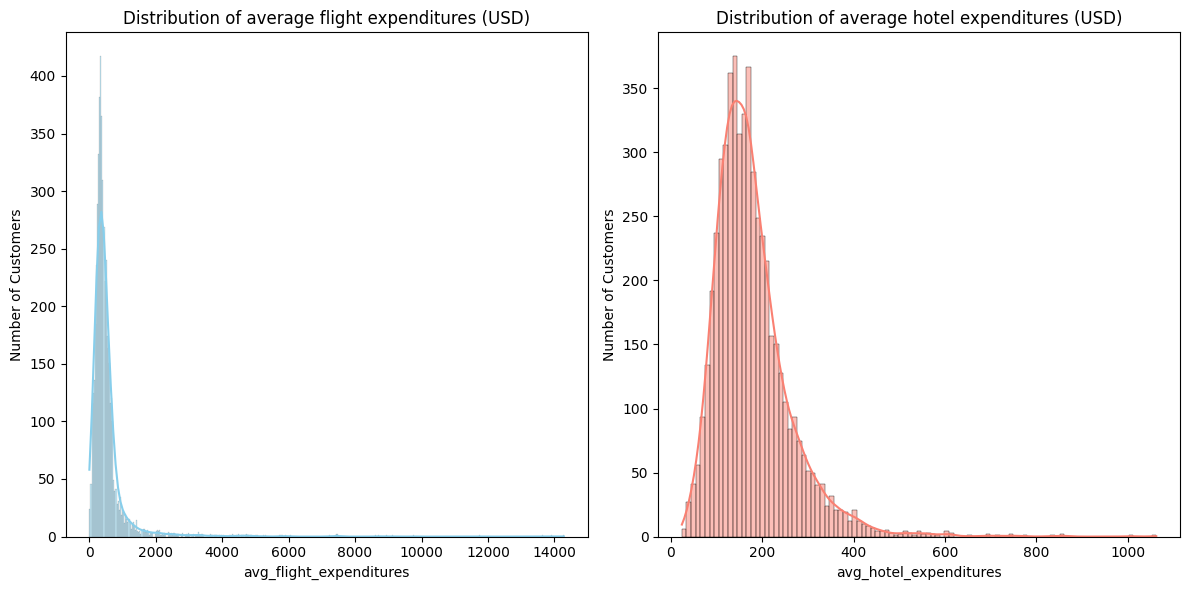

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# loading data
data = pd.read_csv('outliers.csv')

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the distribution of base_fare_usd
plt.subplot(1, 2, 1)
sns.histplot(data['avg_flight_expenditures'], kde=True, color='skyblue')
plt.ylabel('Number of Customers')
plt.title('Distribution of average flight expenditures (USD)')

# Plot the distribution of hotel_per_room_usd
plt.subplot(1, 2, 2)
sns.histplot(data['avg_hotel_expenditures'], kde=True, color='salmon')
plt.ylabel('Number of Customers')
plt.title('Distribution of average hotel expenditures (USD)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Both metrics are showing a normal distribution thus we can procced and apply the empirical rule in order to eliminate outliers and keep 99,7% of the data by using SQL built-in function ABS**

**Below is the normal districbution of flight and hotel spending after eliminating outliers**


In [4]:
from google.colab import files
uploaded = files.upload()


Saving travel_20.csv to travel_20.csv


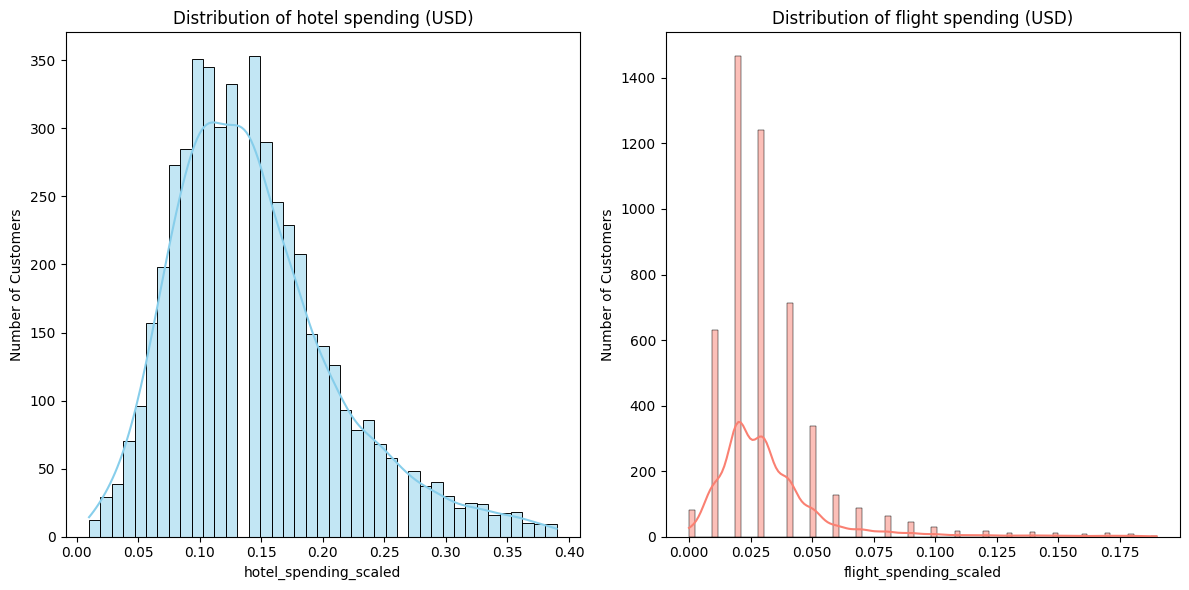

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading data
data = pd.read_csv('travel_20.csv')

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the distribution of base_fare_usd
plt.subplot(1, 2, 1)
sns.histplot(data['hotel_spending_scaled'], kde=True, color='skyblue')
plt.ylabel('Number of Customers')
plt.title('Distribution of hotel spending (USD)')

# Plot the distribution of hotel_per_room_usd
plt.subplot(1, 2, 2)
sns.histplot(data['flight_spending_scaled'], kde=True, color='salmon')
plt.ylabel('Number of Customers')
plt.title('Distribution of flight spending (USD)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

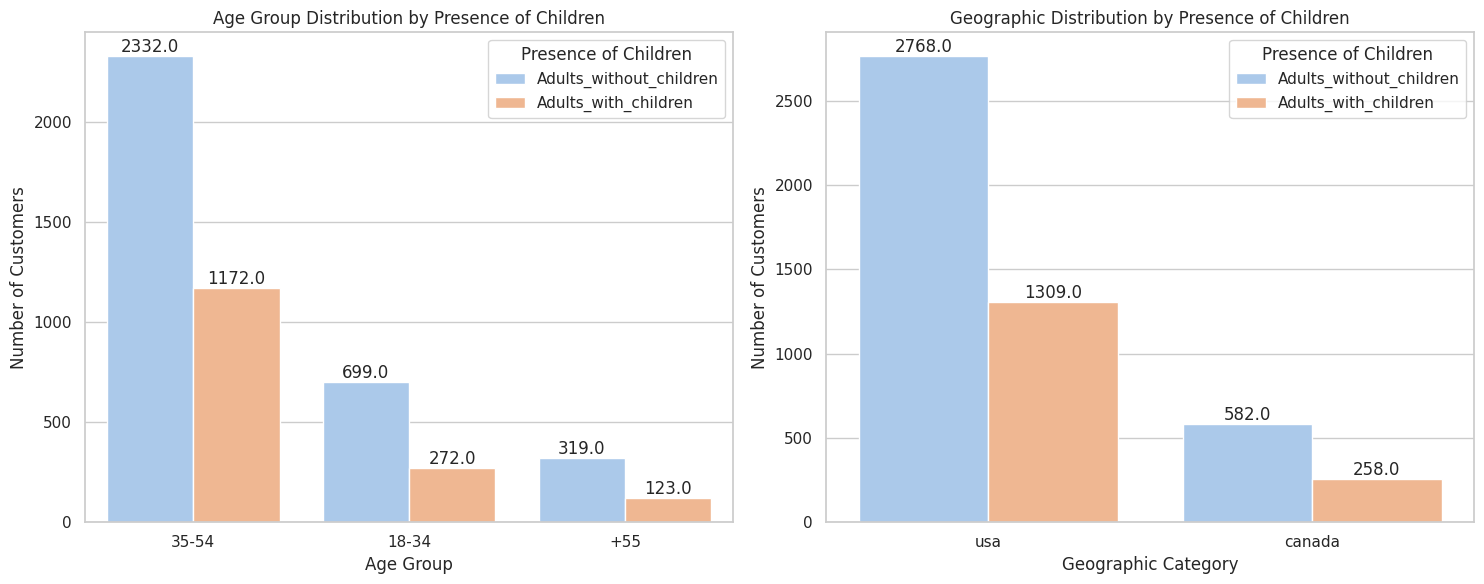

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Creating a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Grouped bar plot for Age Group and Presence of Children
ax1 = sns.countplot(x="age_segment", hue="children_segment", data=data, palette="pastel", ax=axes[0])
axes[0].set_title("Age Group Distribution by Presence of Children")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Number of Customers")
axes[0].legend(title="Presence of Children")

# Adding labels to the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Grouped bar plot for home country and Presence of Children
ax2 = sns.countplot(x="home_country", hue="children_segment", data=data, palette="pastel", ax=axes[1])
axes[1].set_title("Geographic Distribution by Presence of Children")
axes[1].set_xlabel("Geographic Category")
axes[1].set_ylabel("Number of Customers")
axes[1].legend(title="Presence of Children")
axes[1].tick_params(axis="x")

# Adding labels to the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Combine the plots into one
plt.tight_layout()

# Show the combined plot
plt.show()



**From Customer categorization and the visualization above we can assign customers to the following perks to their demographic caracteristiques** :

**Adults with Children**

Relevant Perks:

Free Hotel Meal (especially for family-friendly hotels)

Free Checked Bags (for convenience while traveling with children)

Free Cancellation Fee (for flexibility in case of family emergencies)

Night Free Hotel with Flight (for family vacations)

**Adults without Children**

Relevant Perks:

Hotel Exclusive Discount (targeting adults looking for exclusive deals)

Flight Exclusive Discount (targeting adults looking for exclusive deals)

Free Cancellation Fee (for flexibility in travel plans)

**Customer distribution in each perk decile**

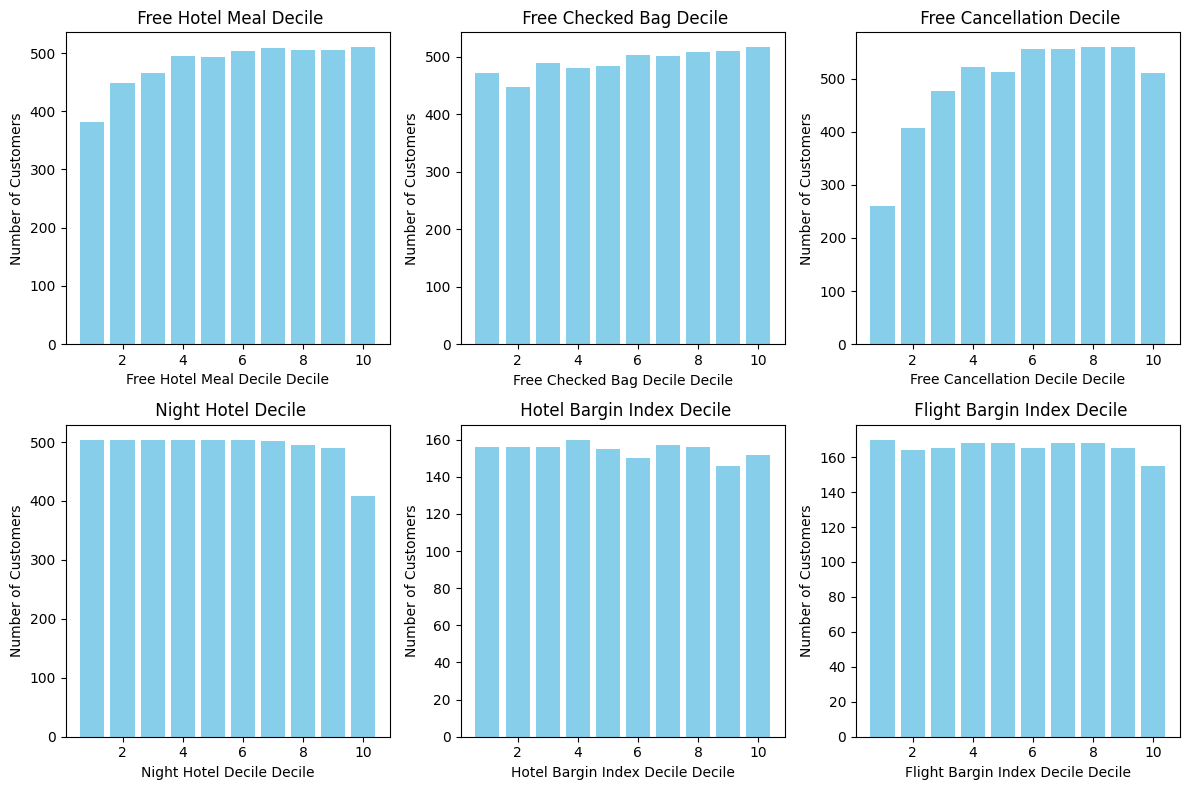

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Loading Data retrived from SQL for customer segmentation using thresholding
data = pd.read_csv('travel_20.csv')

# Define the perks and their corresponding columns
perks = ['free_hotel_meal_decile', 'free_checked_bag_decile', 'free_cancellation_decile',
         'night_hotel_decile', 'hotel_bargin_index_decile', 'flight_bargin_index_decile']

# Create a bar plot for each perk
plt.figure(figsize=(12, 8))

for i, perk in enumerate(perks, start=1):
    plt.subplot(2, 3, i)
    data_perk = data.groupby(perk).size().reset_index(name='count')
    plt.bar(data_perk[perk], data_perk['count'], color='skyblue')
    plt.title(f' {perk.replace("_", " ").title()}')
    plt.xlabel(f'{perk.replace("_", " ").title()} Decile')
    plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


**Customer Segmentation using thresholding method after setting threshold of 20% of top potential customers who qualify for the perks**

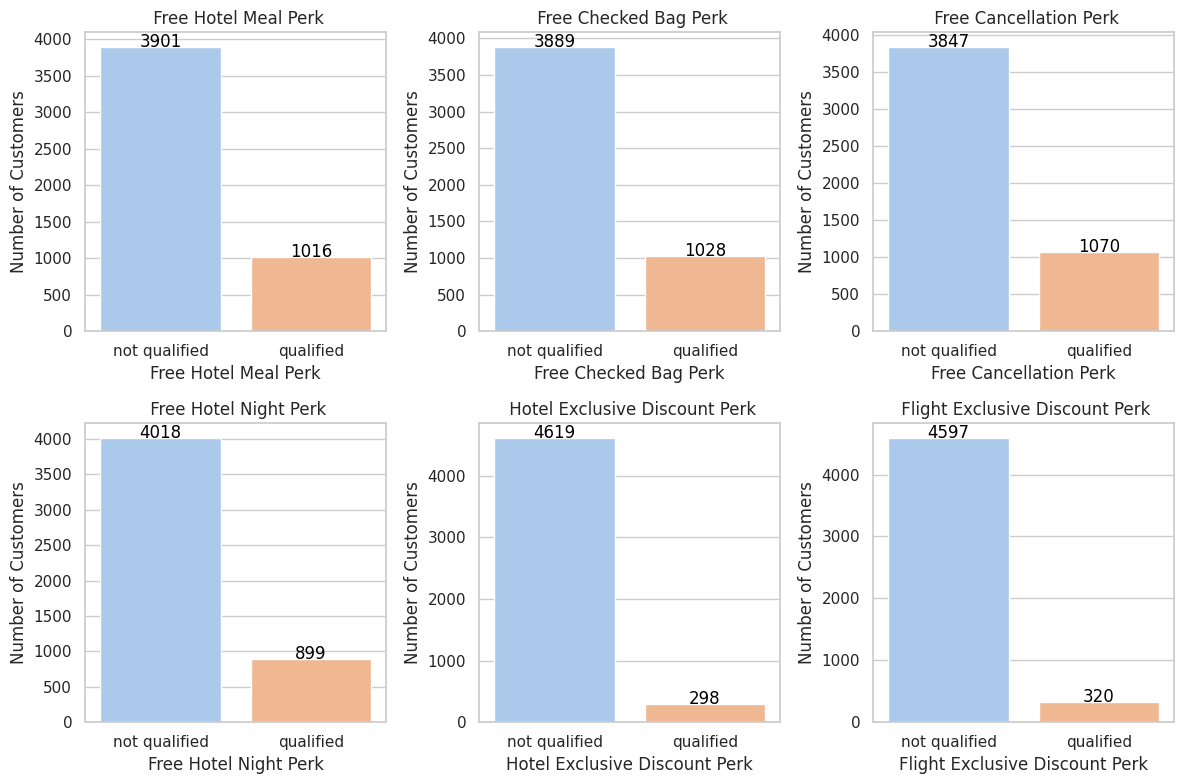

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading Data
data = pd.read_csv('travel_20.csv')

# Defining the perks and their corresponding columns
perks = ['free_hotel_meal_perk', 'free_checked_bag_perk', 'free_cancellation_perk', 'free_hotel_night_perk', 'hotel_exclusive_discount_perk', 'flight_exclusive_discount_perk']

# Setting the "pastel" palette
sns.set_palette("pastel")

# Creating a bar plot for each perk
plt.figure(figsize=(12, 8))

for i, perk in enumerate(perks, start=1):
    plt.subplot(2, 3, i)
    data_perk = data.groupby(perk).size().reset_index(name='count')
    sns.barplot(x=perk, y='count', data=data_perk)
    plt.title(f' {perk.replace("_", " ").title()}')
    plt.xlabel(perk.replace("_", " ").title())
    plt.ylabel('Number of Customers')

    # Adding labels
    for index, row in data_perk.iterrows():
        plt.text(row.name, row['count'], f'{row["count"]}', color='black', ha="center")

plt.tight_layout()
plt.show()


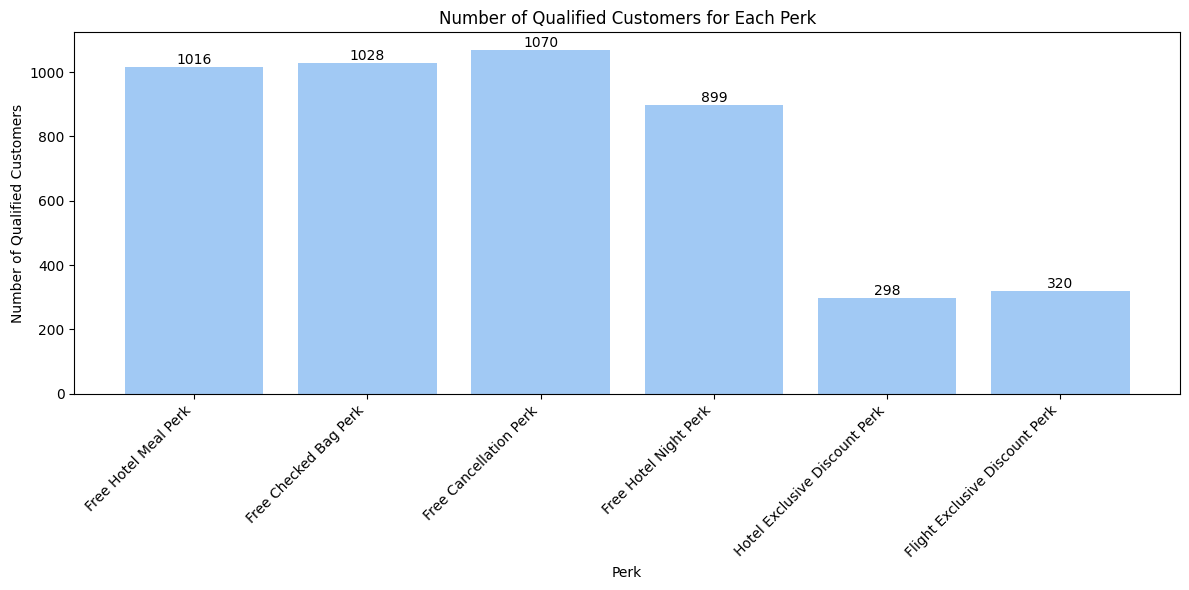

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading Data
data = pd.read_csv('travel_20.csv')

# Defining the perks and their corresponding columns
perks = ['free_hotel_meal_perk', 'free_checked_bag_perk', 'free_cancellation_perk', 'free_hotel_night_perk', 'hotel_exclusive_discount_perk', 'flight_exclusive_discount_perk']

# Use the default Seaborn color palette
sns.set_palette("pastel")

# Creating a bar plot for all perks
plt.figure(figsize=(12, 6))

# Initializing lists to store counts and perk labels
counts = []
perk_labels = []

# Calculating counts for each perk
for i, perk in enumerate(perks):
    qualified_customers = data[data[perk] == 'qualified']
    count = len(qualified_customers)
    counts.append(count)
    perk_labels.append(perk.replace("_", " ").title())

# Creating the grouped bar plot with the default Seaborn palette
bars = plt.bar(perk_labels, counts)
plt.title('Number of Qualified Customers for Each Perk')
plt.xlabel('Perk')
plt.ylabel('Number of Qualified Customers')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black', size=10)

plt.tight_layout()
plt.show()


**Thresholding Segmentation Method Conclusion**

It appears that the qualification rates for these perks are generally low, with a large proportion of customers not qualifying. This could be due to various factors, including eligibility criteria, customer preferences, or promotional strategies.

Among the perks, the exclusive discounts (both for hotels and flights) have the lowest qualification rates, indicating that these perks might have more stringent eligibility requirements or are less popular among customers.

The free hotel night with flight perk has the highest qualification rate among the perks listed, but still, a significant number of customers did not qualify.

It might be worth investigating the eligibility criteria and customer preferences further to understand why certain perks have higher or lower qualification rates. This information can be valuable for refining marketing strategies and targeting specific customer segments.

**Fuzzy Segmentation Method**

In [112]:
from google.colab import files
uploaded = files.upload()

Saving fuzzy2.csv to fuzzy2 (1).csv


In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset here
data = pd.read_csv('fuzzy2.csv')




In [114]:
from sklearn.preprocessing import MinMaxScaler

# Creating a list of perks
features_to_scale = [
    'free_hotel_meal',
    'free_checked_bag',
    'free_cancellation_fee',
    'night_free_hotel_with_flight',
    'flight_exclusive_discount',
    'hotel_exclusive_discount'
]

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying the scaler to the selected features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
data.head()

,user_id,gender,age,married,has_children,home_country,home_city,free_hotel_meal,free_checked_bag,free_cancellation_fee,night_free_hotel_with_flight,flight_exclusive_discount,hotel_exclusive_discount,selected_perk
0,510188,F,33,False,False,usa,san antonio,0.743075,0.000000,0.239915,0.263557,NaN,NaN,Free Checked Bag
1,590420,F,26,False,True,usa,santa ana,0.410119,0.263147,0.000000,0.959607,0.924171,NaN,Free Cancellation Fee
2,546419,F,54,False,True,usa,san diego,0.004522,0.077574,0.078556,0.635572,NaN,0.0,Hotel Exclusive Discount
3,458479,F,43,False,False,usa,chicago,0.494064,0.331856,0.002123,0.984155,0.857820,NaN,Free Cancellation Fee
4,568121,M,40,True,True,usa,chicago,0.000000,0.799113,0.798301,0.106673,0.829384,NaN,Free Hotel Meal


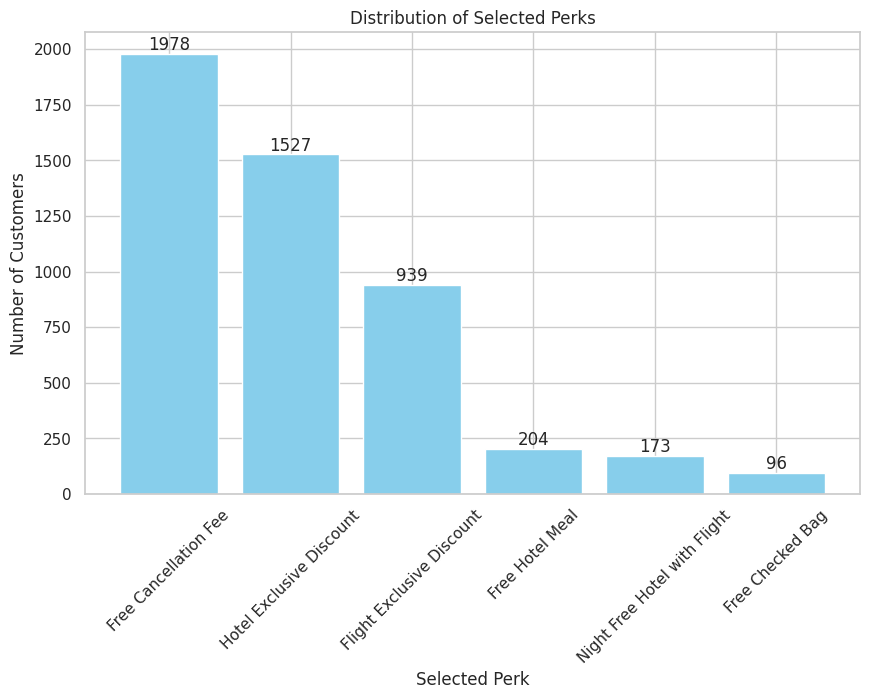

In [116]:
import matplotlib.pyplot as plt


# Counting the occurrences of each selected perk
perk_counts = data['selected_perk'].value_counts()

# Creating a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(perk_counts.index, perk_counts.values, color='skyblue')
plt.xlabel('Selected Perk')
plt.ylabel('Number of Customers')
plt.title('Distribution of Selected Perks')
plt.xticks(rotation=45)

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

Bellow is the summarized overview of the perks after applying fuzzy segmentation

**Free Hotel Meal**

Qualified Customers: 204

Analysis:

Niche Appeal: This perk caters to a specific segment of customers.

Potential for Growth: Further marketing efforts can boost its adoption.

**Free Checked Bag**

Qualified Customers: 96

Analysis:

Limited Interest: Relatively fewer customers qualify for this perk.

Enhancement Opportunity: Consider bundling or targeted promotions.

**Free Cancellation Fee**

Qualified Customers: 1978

Analysis:

High Demand: This perk is popular among a significant customer base.

Retention Strategy: Continue offering to retain and attract more customers.

**Night Free Hotel with Flight**

Qualified Customers: 173

Analysis:
Attractive Offer: Appeals to travelers valuing combined flight and hotel deals.

Optimization Potential: Fine-tune promotion and availability for increased adoption.

**Flight Exclusive Discount**

Qualified Customers: 939

Analysis:

Strong Interest: A considerable number of customers value flight discounts.

Sustain Interest: Continue promoting exclusive flight discounts.

**Hotel Exclusive Discount**

Qualified Customers: 1527

Analysis:
High Interest: This perk resonates with a large customer base.

Feature Prominently: Continue showcasing hotel-exclusive discounts.



**K-Mean**

In [78]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'data' is your DataFrame
data = pd.read_csv('travel_20.csv')

# Select the features you want to use for clustering
features = ['hotel_spending_scaled', 'flight_spending_scaled']

# Extract the selected features
X = data[features]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=5)

# Learn the clusters
kmeans.fit(X)

# Extract the cluster labels
labels = kmeans.labels_

# Add the cluster labels back to the DataFrame
data['cluster'] = labels

data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,gender,age,age_segment,married,has_children,children_segment,distance_flown,home_country,home_city,...,night_hotel_free,night_hotel_decile,free_hotel_night_perk,hotel_bargin_index,hotel_bargin_index_decile,hotel_exclusive_discount_perk,flight_bargin_index,flight_bargin_index_decile,flight_exclusive_discount_perk,cluster
0,94883,F,51,35-54,True,False,Adults_without_children,2902.67,usa,kansas city,...,0.03,8,not qualified,NaN,NaN,not qualified,NaN,NaN,not qualified,3
1,101486,F,49,35-54,True,True,Adults_with_children,995.68,usa,tacoma,...,0.03,7,not qualified,NaN,NaN,not qualified,NaN,NaN,not qualified,1
2,101961,F,41,35-54,True,False,Adults_without_children,6832.85,usa,boston,...,0.00,1,not qualified,NaN,NaN,not qualified,0.00018,1.0,not qualified,1
3,118043,F,51,35-54,False,True,Adults_with_children,7515.50,usa,los angeles,...,0.03,7,not qualified,0.002,8.0,not qualified,NaN,NaN,not qualified,4
4,120851,F,49,35-54,True,True,Adults_with_children,2259.80,usa,santa ana,...,0.06,9,qualified,NaN,NaN,not qualified,NaN,NaN,not qualified,1


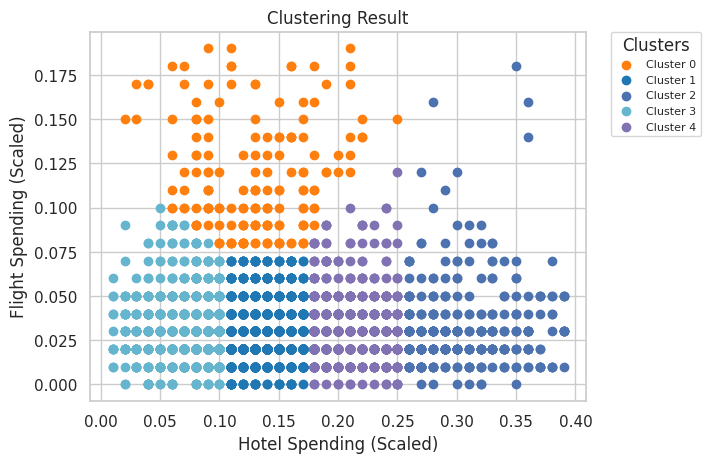

In [79]:
import matplotlib.pyplot as plt

# Define a list of colors for each cluster
colors = ['#ff7f0e', '#1f77b4', 'b', 'c', 'm']  # Using default orange and blue

# Scatter plot
for cluster_id, color in enumerate(colors):
    cluster_data = data[data['cluster'] == cluster_id]
    plt.scatter(cluster_data['hotel_spending_scaled'], cluster_data['flight_spending_scaled'], c=color, label=f'Cluster {cluster_id}')

plt.xlabel('Hotel Spending (Scaled)')
plt.ylabel('Flight Spending (Scaled)')
plt.title('Clustering Result')

# Create a legend outside of the plot with adjusted size
legend = plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 8})

plt.show()


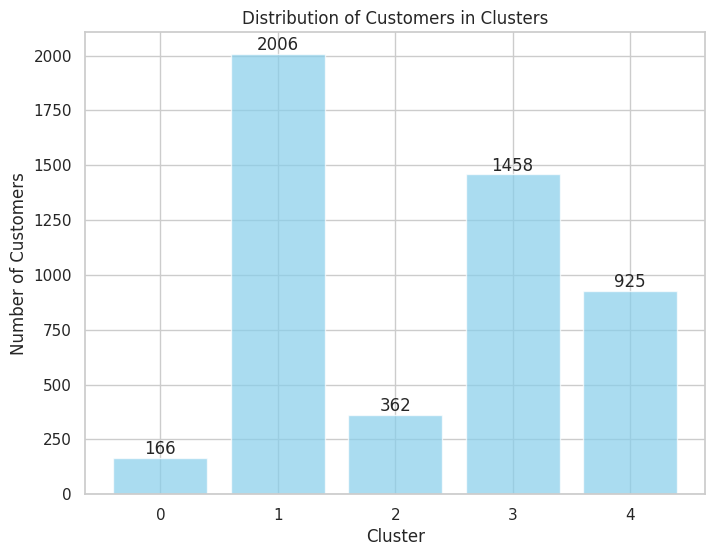

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with the 'cluster' column
#data = pd.read_csv('travel_20.csv')

# Selecting the 'cluster' column
clusters = data['cluster']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(clusters, bins=range(6), align='left', rwidth=0.8, color='skyblue', alpha=0.7)

# Adding labels and title
plt.title('Distribution of Customers in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(range(5))

# Adding labels above each bar
for i in range(5):
    count = clusters[clusters == i].count()
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

In [60]:
# Assuming you have already performed the clustering and added the 'cluster' column

# Define the statistics you want to calculate
summary_stats = ['mean', 'median', 'std', 'min', 'max']

# Initialize a list to store cluster summaries
results_list = []

# Iterate through each cluster and calculate the statistics
for cluster in clusters:
    cluster_data = data[data['cluster'] == cluster]
    cluster_summary = [cluster]

    for stat in summary_stats:
        if stat == 'mean':
            value = cluster_data['hotel_spending_scaled'].mean()  # Use the actual column name
        elif stat == 'median':
            value = cluster_data['hotel_spending_scaled'].median()  # Use the actual column name
        elif stat == 'std':
            value = cluster_data['hotel_spending_scaled'].std()  # Use the actual column name
        elif stat == 'min':
            value = cluster_data['hotel_spending_scaled'].min()  # Use the actual column name
        elif stat == 'max':
            value = cluster_data['hotel_spending_scaled'].max()  # Use the actual column name

        cluster_summary.append(value)

    results_list.append(cluster_summary)

# Create a DataFrame from the list of cluster summaries
results = pd.DataFrame(results_list, columns=['Cluster'] + [f'{stat.capitalize()} Value' for stat in summary_stats])

print(results)





   Cluster  Mean Value  Median Value  Std Value  Min Value  Max Value
0        1    0.295186          0.29   0.039251       0.25       0.39
1        0    0.076331          0.08   0.021468       0.01       0.10
2        4    0.128000          0.13   0.043212       0.02       0.22
3        3    0.133622          0.13   0.016678       0.11       0.16
4        2    0.197108          0.19   0.022330       0.17       0.24


In [64]:
# Define the statistics you want to calculate
summary_stats = ['mean', 'median', 'std', 'min', 'max']

# Initialize a list to store cluster summaries
results_list = []

# Iterate through each cluster and calculate the statistics for hotel spending
for cluster in clusters:
    cluster_data = data[data['cluster'] == cluster]
    cluster_summary = [cluster]

    for stat in summary_stats:
        if stat == 'mean':
            value = cluster_data['hotel_spending_scaled'].mean()  # Use the actual column name for hotel spending
        elif stat == 'median':
            value = cluster_data['hotel_spending_scaled'].median()  # Use the actual column name for hotel spending
        elif stat == 'std':
            value = cluster_data['hotel_spending_scaled'].std()  # Use the actual column name for hotel spending
        elif stat == 'min':
            value = cluster_data['hotel_spending_scaled'].min()  # Use the actual column name for hotel spending
        elif stat == 'max':
            value = cluster_data['hotel_spending_scaled'].max()  # Use the actual column name for hotel spending

        cluster_summary.append(value)

    # Calculate the statistics for flight spending
    for stat in summary_stats:
        if stat == 'mean':
            value = cluster_data['flight_spending_scaled'].mean()  # Use the actual column name for flight spending
        elif stat == 'median':
            value = cluster_data['flight_spending_scaled'].median()  # Use the actual column name for flight spending
        elif stat == 'std':
            value = cluster_data['flight_spending_scaled'].std()  # Use the actual column name for flight spending
        elif stat == 'min':
            value = cluster_data['flight_spending_scaled'].min()  # Use the actual column name for flight spending
        elif stat == 'max':
            value = cluster_data['flight_spending_scaled'].max()  # Use the actual column name for flight spending

        cluster_summary.append(value)

    results_list.append(cluster_summary)

# Create a DataFrame from the list of cluster summaries
results_combined = pd.DataFrame(results_list, columns=['Cluster'] +
                                [f'Hotel {stat.capitalize()} Value' for stat in summary_stats] +
                                [f'Flight {stat.capitalize()} Value' for stat in summary_stats])

print(results_combined)



   Cluster  Hotel Mean Value  Hotel Median Value  Hotel Std Value  \
0        1          0.295186                0.29         0.039251   
1        0          0.076331                0.08         0.021468   
2        4          0.128000                0.13         0.043212   
3        3          0.133622                0.13         0.016678   
4        2          0.197108                0.19         0.022330   

   Hotel Min Value  Hotel Max Value  Flight Mean Value  Flight Median Value  \
0             0.25             0.39           0.032093                 0.03   
1             0.01             0.10           0.029342                 0.03   
2             0.02             0.22           0.117394                 0.11   
3             0.11             0.16           0.027952                 0.03   
4             0.17             0.24           0.029580                 0.03   

   Flight Std Value  Flight Min Value  Flight Max Value  
0          0.024078              0.00              0

**Statistical Analysis**

**Cluster 0**:

**Hotel Spending**: This cluster has the lowest spending on hotels compared to other clusters. The spending ranges from 0.01 to 0.10 with an average of 0.076. The spending values are relatively tightly grouped around the mean (std of 0.021).

**Flight Spending**: Flight spending in this cluster is also relatively low, ranging from 0.00 to 0.10 with an average of 0.029. The spending values have a similar tight grouping around the mean (std of 0.016).

**Cluster 1**:

**Hotel Spending**: This cluster has the highest spending on hotels compared to other clusters. The spending ranges from 0.25 to 0.39 with an average of 0.295. The spending values are somewhat spread out, with a standard deviation of 0.039.

**Flight Spending**: Flight spending in this cluster is relatively low, ranging from 0.00 to 0.18 with an average of 0.032. The spending values have a moderate spread around the mean (std of 0.024).

**Cluster 2**:

**Hotel Spending**: This cluster has moderately high spending on hotels. The spending ranges from 0.17 to 0.24 with an average of 0.197. The spending values are relatively tightly grouped around the mean (std of 0.022).

**Flight Spending**: Flight spending in this cluster is relatively low, ranging from 0.00 to 0.10 with an average of 0.030. The spending values have a similar tight grouping around the mean (std of 0.016).

**Cluster 3**:

**Hotel Spending**: This cluster has moderate spending on hotels. The spending ranges from 0.11 to 0.16 with an average of 0.134. The spending values are tightly grouped around the mean (std of 0.017).

**Flight Spending**: Flight spending in this cluster is relatively low, ranging from 0.00 to 0.07 with an average of 0.028. The spending values are tightly grouped around the mean (std of 0.014).

**Cluster 4**:

**Hotel Spending**: This cluster has moderately low spending on hotels. The spending ranges from 0.02 to 0.22 with an average of 0.128. The spending values have a moderate spread around the mean (std of 0.043).

**Flight Spending**: Flight spending in this cluster is the highest among all clusters, ranging from 0.08 to 0.19 with an average of 0.117. The spending values have a relatively wide spread around the mean (std of 0.032).


**Perks Assignement**

**Cluster 0**:

**Hotel Spending**: Low

**Flight Spending**: Low

**Potential Perks**:

**Free Checked Bag Perk**: Customers in this cluster might benefit from a perk that offers a free checked bag to encourage them to spend a bit more on flights.

**Free Cancellation Perk**: Offering flexibility in travel plans could be appealing to these customers who might be more price-conscious.

**Cluster 1**:

**Hotel Spending**: High

**Flight Spending**: Low

**Potential Perks**:

**Hotel Exclusive Discount Perk**: Customers in this cluster who spend a lot on hotels could be offered exclusive discounts or special offers for hotel bookings.

**Free Hotel Meal Perk**: Offering a complimentary meal during their hotel stay might incentivize them to choose certain hotels.

**Cluster 2**:

**Hotel Spending**: Moderate

**Flight Spending**: Low

**Potential Perks**:

**Hotel Exclusive Discount Perk**: These customers might be enticed by discounts on hotel bookings.

**Free Hotel Night Perk**: Offering a free night's stay after a certain number of bookings could encourage loyalty.

**Cluster 3**:

**Hotel Spending**: Moderate

**Flight Spending**: Low

**Potential Perks**:

**Free Checked Bag Perk**: Providing a free checked bag could be a valuable perk for these customers.

**Free Cancellation Perk**: Flexibility in travel plans might be important to this group.

**Cluster 4**:

**Hotel Spending**: Moderate

**Flight Spending**: High

**Potential Perks**:

**Flight Exclusive Discount Perk**: Customers in this cluster who spend a lot on flights could be offered exclusive discounts or special offers for flights.

**Free Checked Bag Perk**: Offering a free checked bag could be an attractive perk for frequent flyers.